<h1>ASTR3050 Python Worksheet</h1>

In this worksheet your will find a numerical solution to problem 9.28 from Carroll & Ostlie.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<font color=navy><big><b>Problem 9.28 from C&O: </b></big><p>

In this problem you will use the values of the density and opacity at various points near the surface of the star to calculate optical depth and of these points.  The data in Table 9.5 were obtained from the stellar model building program <tt>StarStar</tt>, described in section 10.5 and Appendix L.  The first point listed is at the surface of the stellar model.<p>

<b>(a) First you will need to read in Table 9.5.  To do this we will use the astropy.io.ascii function:</b>
<p>This table can be read with the following:</p>
<div class="highlight-python"><div class="highlight"><pre><span class="gp">&gt;&gt;&gt; </span><span class="kn">from</span> <span class="nn">astropy.io</span> <span class="kn">import</span> <span class="n">ascii</span>
<span class="gp">&gt;&gt;&gt; </span><span class="n">data</span> <span class="o">=</span> <span class="n">ascii</span><span class="o">.</span><span class="n">read</span><span class="p">(</span><span class="s">&quot;CO_Table95v2.txt&quot;</span><span class="p">)</span>

</pre></div>
</div>

<font color=navy> You now have a table objet called <tt><font color=black>data</tt></font>.  Try the print command to see what it looks like. <p>

In [3]:
#Import the ascii module, and read in the starstar_model data
from astropy.io import ascii
data = ascii.read("CO_Table95v2.txt")
print(data)

 zone      r          T         rho      kap  
----- ----------- ---------- --------- -------
  0.0 737200000.0        0.0       0.0     0.0
  1.0 736400000.0     3167.0 1.548e-08   23.76
  2.0 736400000.0     8562.0  4.29e-08   1.686
  3.0 735700000.0    13970.0 1.041e-08  0.1299
  4.0 735000000.0    19390.0 9.552e-08  0.2136
  5.0 734200000.0    22100.0 2.492e-08 0.09525
  6.0 733500000.0    22100.0 3.604e-08 0.08602
  7.0 732800000.0    22100.0 7.299e-10 0.03629
  8.0 732000000.0    22100.0 1.023e-08 0.05299
  9.0 731300000.0    22100.0 1.781e-08 0.06359
  ...         ...        ...       ...     ...
423.0  81090000.0 12390000.0   64460.0  0.1724
424.0  73720000.0 12690000.0   66920.0  0.1657
425.0  66350000.0 12970000.0   69130.0  0.1596
426.0  58970000.0 13230000.0   71040.0  0.1535
427.0  51600000.0 13470000.0   72690.0  0.1481
428.0  44230000.0 13690000.0   74000.0  0.1428
429.0  36860000.0 13900000.0   74920.0  0.1373
430.0  29490000.0 14120000.0   75310.0  0.1307
431.0  221200

<font color=red>Instructor Solution for part (a)</font>

<!--
#Import the ascii module, and read in the starstar_model data
from astropy.io import ascii
data = ascii.read("CO_Table95v2.txt")
print(data)
-->

Note that the table contains values for the Temperature (T), denisty (rho) and opacity (kappa) at various points (r) near the surface of a star.  In part (c) we are going to integrate $\tau = \int d\tau = -\kappa\rho ds$ through the atmosphere of the star (note that since photons travel upwards from the interior, $ds=dr$ here).  <p>
    
 <p>To manipulate individual columns of the table, you may use the following:</p>
<div class="highlight-python"><div class="highlight"><pre><span class="gp">&gt;&gt;&gt; </span> <span class="nn">radius = data["r"][0:60]</span> 
</pre></div>
</div>

<b>(b) To visualize the function you will integrate over, make a plot of $\kappa\rho$ vs. $r$ </b>. After you've read part (c), think about what area under the curve $\tau_{i+1}-\tau_i$ corresponds to.  Does the expression for the simple trapezoidal rule given in part (c) make sense? <p>

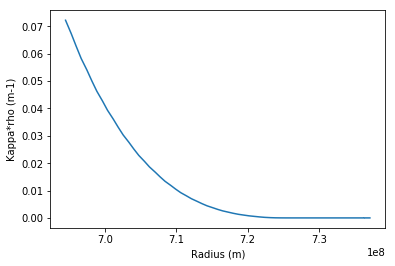

In [4]:
r = data["r"][0:60]
temp = data["T"][0:60]
rho = data["rho"][0:60]
kappa = data["kap"][0:60]

plt.xlabel("Radius (m)")
plt.ylabel("Kappa*rho (m-1)")
plt.plot(r, kappa*rho)

<font color=red>Instructor Solution for part (b)</font>

<!--
r = data["r"][0:60]
temp = data["T"][0:60]
rho = data["rho"][0:60]
kappa = data["kap"][0:60]

plt.xlabel("Radius (m)")
plt.ylabel("Kappa*rho (m-1)")
plt.plot(r, kappa*rho)
-->

<b>(c) Compute the optical depth, $\tau$, at each point by numerically integrating Eq. (9.15).  Use a simple trapezoidal rule such that:</b><p>
$d\tau = -\kappa\rho ds$<p>

becomes<p>

$\tau_{i+1}-\tau_i =-\big(\dfrac{\kappa_i\rho_i\,\, +\,\, \kappa_{i+1}\rho_{i+1}}{2}\big)(r_{i+1}-r_{-i})$<p>

Where $i$ and $i+1$ designate adjacent zones in the model.  Note that because $s$ is measured along the path traveled by the photons, $ds=dr$.<p>

<font color=green>(Hint: what is $\tau_0$?  One you know this, you can calculate all other $\tau_i$).</font> 
<p>
    
To do this you will need to use a for-loop.  Take a look at the example below.

In [7]:
n = len(r)
tau = np.zeros(n)
tau[0]=2.
for i in range(n-1):
    tau[i+1]=tau[i]+3
    print(tau[i])

2.0
5.0
8.0
11.0
14.0
17.0
20.0
23.0
26.0
29.0
32.0
35.0
38.0
41.0
44.0
47.0
50.0
53.0
56.0
59.0
62.0
65.0
68.0
71.0
74.0
77.0
80.0
83.0
86.0
89.0
92.0
95.0
98.0
101.0
104.0
107.0
110.0
113.0
116.0
119.0
122.0
125.0
128.0
131.0
134.0
137.0
140.0
143.0
146.0
149.0
152.0
155.0
158.0
161.0
164.0
167.0
170.0
173.0
176.0


In [9]:
#This cell is for part (c)

r = data["r"][0:60]
temperature = data["T"][0:60]
rho = data["rho"][0:60]
kappa = data["kap"][0:60]

n = len(r)
tau = np.zeros(n)
tau[0]=0.
for i in range(n-1):
    tau[i+1]=tau[i] - 0.5*(kappa[i+1]*rho[i+1] + kappa[i]*rho[i])*(r[i+1]-r[i])

<font color=red>Instructor Solution for part (c)</font>

<!--
r = data["r"][0:60]
temperature = data["T"][0:60]
rho = data["rho"][0:60]
kappa = data["kap"][0:60]

n = len(r)
tau = np.zeros(n)
tau[0]=0.
for i in range(n-1):
    tau[i+1]=tau[i] - 0.5*(kappa[i+1]*rho[i+1] + kappa[i]*rho[i])*(r[i+1]-r[i])
-->

<b> (d)Make a graph of the temperature ($T$, vertical axis) vs the optical depth ($\tau$).</b>  Don't forget to label your axes!<p>

Text(0,0.5,'Temperature (K)')

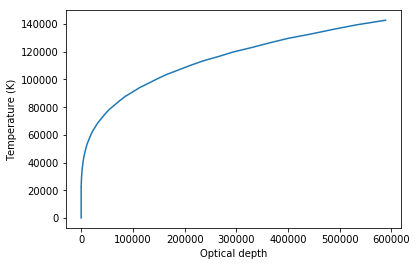

In [20]:
plt.plot(tau,temp)
plt.xlabel('Optical depth')
plt.ylabel('Temperature (K)')

<font color=red>Instructor Solution for part (d)</font>

<!--
plt.plot(tau,temp)
plt.xlabel('Optical depth')
plt.ylabel('Temperature (K)')
-->

<b>(e)For each value of the optical depth, use the Eddiginton approximation (Eq. 9.53) to compute the temperature of a plane-parallel gray atmosphere in LTE:<p>
$T^4 = \frac{3}{4}T_e^4 \big(\tau_v + \frac{2}{3}\big)$    <p>
    
Plot these values of $T$ on the same graph. as in part (d).  You can examine the portion of the plot close to $\tau=0$ by adjusting the x-axis limits:</b> <tt>plt.xlim(0,10000)</tt>

(0, 10000)

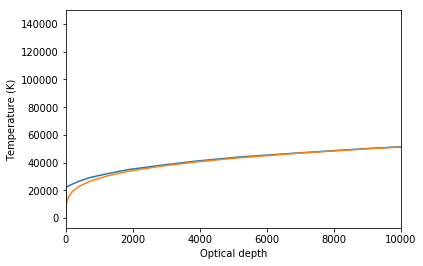

In [26]:
#This cell is for part (e)

t_e= 5504.
t_approx = 3./4.*t_e**4*(tau + 2/3)

plt.plot(tau,temp)
plt.plot(tau,t_approx**0.25)
plt.xlabel('Optical depth')
plt.ylabel('Temperature (K)')
plt.xlim(0,10000)

<font color=red>Instructor Solution for part (e)</font>

<!--
t_e= 5504.
t_approx = 3./4.*t_e**4*(tau + 2/3)

plt.plot(tau,temp)
plt.plot(tau,t_approx**0.25)
plt.xlabel('Optical depth')
plt.ylabel('Temperature (K)')
plt.xlim(0,10000)
-->

<b>(f)The <tt>StarStar</tt> program utilizes a simplifying assumption that the surface temperature is zero (see Appendix L).  Comment on the validity of the surface value of $T$ that you found in part (e). <b>

In [27]:
#This cell is for part (f)